# Project: Movie Recommandation System

In [1]:
# import necessary packages/liraries 
import pandas as pd
import numpy as nb
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud



In [2]:
# extract the dataset
df = pd.read_csv('top10K-TMDB-movies.csv')
df.head()

,id,title,genre,original_language,overview,popularity,release_date,vote_average,vote_count
0,278,The Shawshank Redemption,"Drama,Crime",en,Framed in the 1940s for the double murder of h...,94.075,1994-09-23,8.7,21862
1,19404,Dilwale Dulhania Le Jayenge,"Comedy,Drama,Romance",hi,"Raj is a rich, carefree, happy-go-lucky second...",25.408,1995-10-19,8.7,3731
2,238,The Godfather,"Drama,Crime",en,"Spanning the years 1945 to 1955, a chronicle o...",90.585,1972-03-14,8.7,16280
3,424,Schindler's List,"Drama,History,War",en,The true story of how businessman Oskar Schind...,44.761,1993-12-15,8.6,12959
4,240,The Godfather: Part II,"Drama,Crime",en,In the continuing saga of the Corleone crime f...,57.749,1974-12-20,8.6,9811


In [3]:
df.shape

(10000, 9)

In [4]:
df.columns

Index(['id', 'title', 'genre', 'original_language', 'overview', 'popularity',
       'release_date', 'vote_average', 'vote_count'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 10000 non-null  int64  
 1   title              10000 non-null  object 
 2   genre              9997 non-null   object 
 3   original_language  10000 non-null  object 
 4   overview           9987 non-null   object 
 5   popularity         10000 non-null  float64
 6   release_date       10000 non-null  object 
 7   vote_average       10000 non-null  float64
 8   vote_count         10000 non-null  int64  
dtypes: float64(2), int64(2), object(5)
memory usage: 703.3+ KB


In [6]:
df['overview'].head()

0    Framed in the 1940s for the double murder of h...
1    Raj is a rich, carefree, happy-go-lucky second...
2    Spanning the years 1945 to 1955, a chronicle o...
3    The true story of how businessman Oskar Schind...
4    In the continuing saga of the Corleone crime f...
Name: overview, dtype: object

In [7]:
df['original_language'].unique()

array(['en', 'hi', 'es', 'ja', 'ko', 'it', 'pt', 'ru', 'zh', 'fr', 'tr',
       'sv', 'ar', 'de', 'bn', 'cn', 'da', 'nl', 'th', 'fa', 'hu', 'pl',
       'sh', 'sr', 'et', 'id', 'no', 'cs', 'te', 'ro', 'bs', 'el', 'fi',
       'is', 'ml', 'la', 'af', 'uk', 'eu', 'nb', 'he', 'ab', 'xx'],
      dtype=object)

In [8]:
df['genre'].nunique()

2123

## Cleaning data 

In [9]:
df.isna().sum()

id                    0
title                 0
genre                 3
original_language     0
overview             13
popularity            0
release_date          0
vote_average          0
vote_count            0
dtype: int64

In [10]:
df = df.dropna()

In [11]:
df.shape

(9985, 9)

<Axes: >

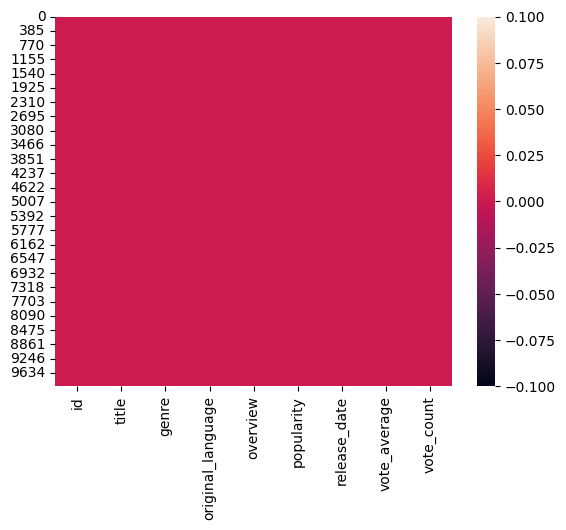

In [12]:
# check the missing values
sns.heatmap(df.isna())

In [13]:
df.duplicated().any()

False

In [14]:
df.describe()

,id,popularity,vote_average,vote_count
count,9985.000000,9985.000000,9985.000000,9985.000000
mean,161307.213821,34.741494,6.622744,1549.249775
std,211496.747410,211.840052,0.765225,2649.809602
min,5.000000,0.600000,4.600000,200.000000
25%,10122.000000,9.169000,6.100000,315.000000
50%,29702.000000,13.652000,6.600000,585.000000
75%,310137.000000,25.687000,7.200000,1462.000000
max,934761.000000,10436.917000,8.700000,31917.000000


In [15]:
df.describe(include=[object])

,title,genre,original_language,overview,release_date
count,9985,9985,9985,9985,9985
unique,9646,2123,43,9983,6107
top,Beauty and the Beast,Comedy,en,"""Loro"", in two parts, is a period movie that c...",2017-10-20
freq,4,734,7809,2,9


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9985 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 9985 non-null   int64  
 1   title              9985 non-null   object 
 2   genre              9985 non-null   object 
 3   original_language  9985 non-null   object 
 4   overview           9985 non-null   object 
 5   popularity         9985 non-null   float64
 6   release_date       9985 non-null   object 
 7   vote_average       9985 non-null   float64
 8   vote_count         9985 non-null   int64  
dtypes: float64(2), int64(2), object(5)
memory usage: 780.1+ KB


In [17]:
df_corr = df[['id','popularity','vote_average','vote_count']]

In [18]:
df_corr.corr()

,id,popularity,vote_average,vote_count
id,1.000000,0.120664,-0.005570,-0.066332
popularity,0.120664,1.000000,0.063421,0.092759
vote_average,-0.005570,0.063421,1.000000,0.267340
vote_count,-0.066332,0.092759,0.267340,1.000000


<Axes: >

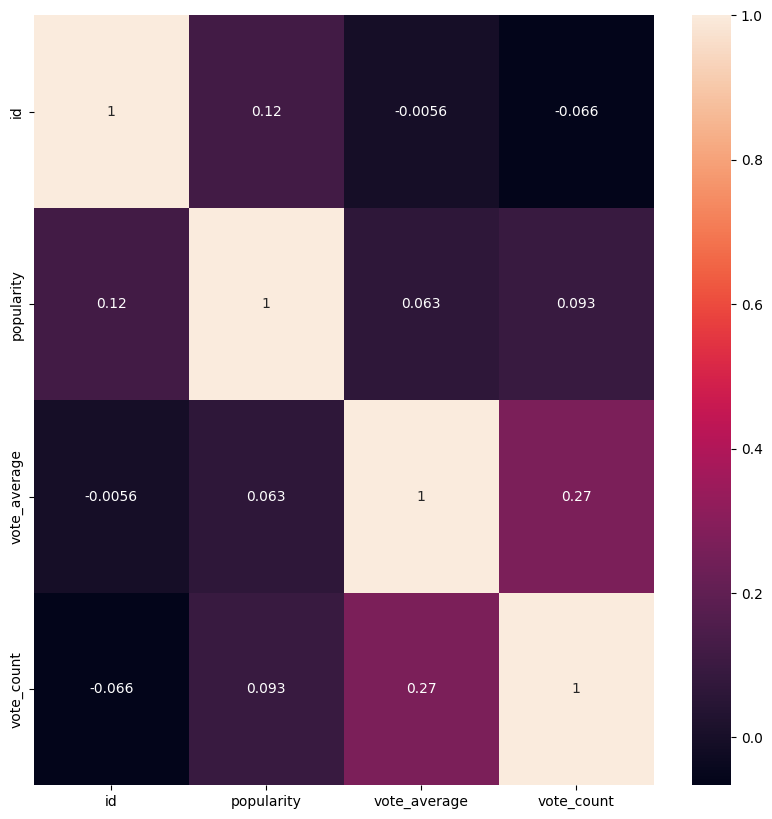

In [19]:
corr = df.select_dtypes(include=['float','int']).corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr, annot=True)


C:\Users\MSI\AppData\Roaming\Python\Python312\site-packages\seaborn\axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
C:\Users\MSI\AppData\Roaming\Python\Python312\site-packages\seaborn\axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
C:\Users\MSI\AppData\Roaming\Python\Python312\site-packages\seaborn\axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
C:\Users\MSI\AppData\Roaming\Python\Python312\site-packages\seaborn\axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
C:\Users\MSI\AppData\Roaming\Python\Python312\site-packages\seaborn\axisgrid.py:1615: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=x, y=y, **kwargs)
C:\Users\MSI\AppData\Roaming\P

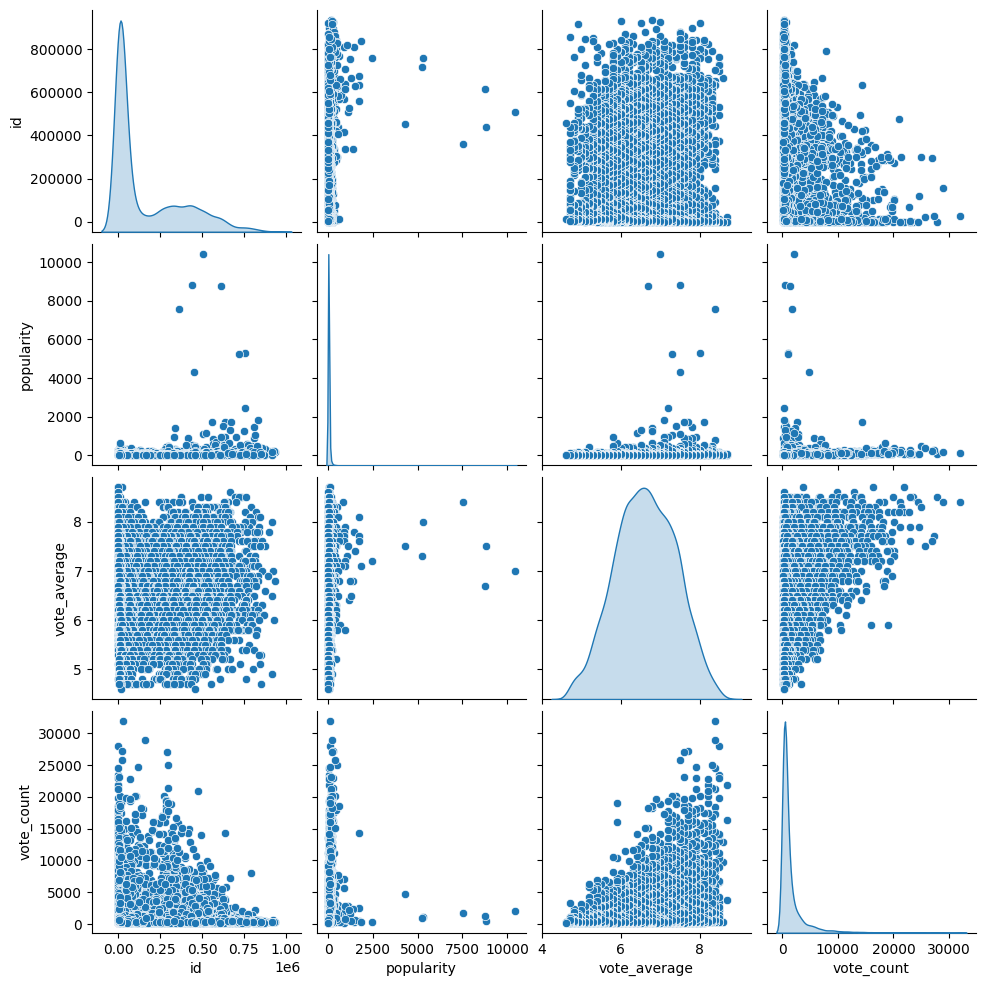

In [20]:
sns.pairplot(data=df, diag_kind="kde", palette="husl");

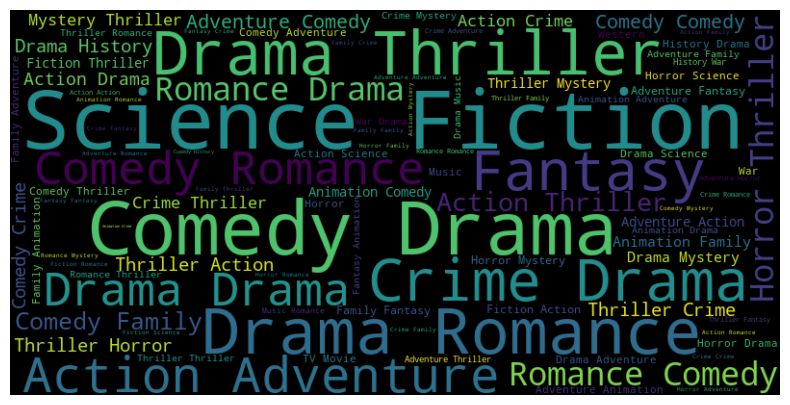

In [21]:
# Ensure all entries in 'genre' are strings and handle NaNs
df['genre'] = df['genre'].astype(str).fillna('')

# Combine all text in the 'genre' column
text = ', '.join(df['genre'])

# Create a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='black').generate(text)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Hide the axes
plt.show()

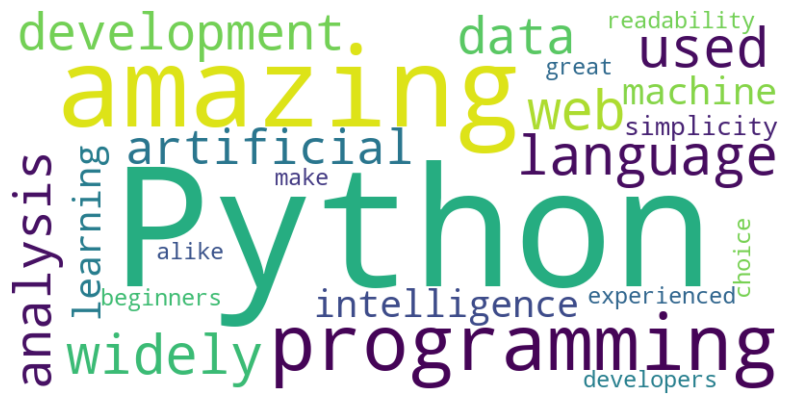

In [22]:
# Import necessary libraries
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Sample text
text = """Python is an amazing programming language. Python is widely used for web development, data analysis, artificial intelligence, 
machine learning, and more. Python's simplicity and readability make it a great choice for beginners and experienced developers alike."""

# Create a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Hide the axes
plt.show()

In [23]:
from sklearn.feature_extraction.text import CountVectorizer

# Sample documents
documents = [
    "I love programming in Python",
    "Python is great for data science",
    "I enjoy learning new programming languages"
]

# Create a CountVectorizer instance
vectorizer = CountVectorizer()

# Fit and transform the documents
X = vectorizer.fit_transform(documents)

# Convert to array and display
print(X.toarray())
print(vectorizer.get_feature_names_out())

[[0 0 0 0 1 0 0 0 1 0 1 1 0]
 [1 0 1 1 0 1 0 0 0 0 0 1 1]
 [0 1 0 0 0 0 1 1 0 1 1 0 0]]
['data' 'enjoy' 'for' 'great' 'in' 'is' 'languages' 'learning' 'love'
 'new' 'programming' 'python' 'science']


In [ ]:
movie = df['']